In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchsummary import summary
from models.resnet import ResNet, BasicBlock
from utils import train, test, plot_stats, PlotOutput, get_device

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
device = get_device()
device

'cuda'

In [3]:
# augmentations
mean = [0.4914, 0.4822, 0.4465]
std = [0.2023, 0.1994, 0.2010]

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])

# datasets
trainset = datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform_train)

testset = datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform_test)

# dataloaders
BATCH_SIZE = 128
train_loader = torch.utils.data.DataLoader(
    trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

test_loader = torch.utils.data.DataLoader(
    testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


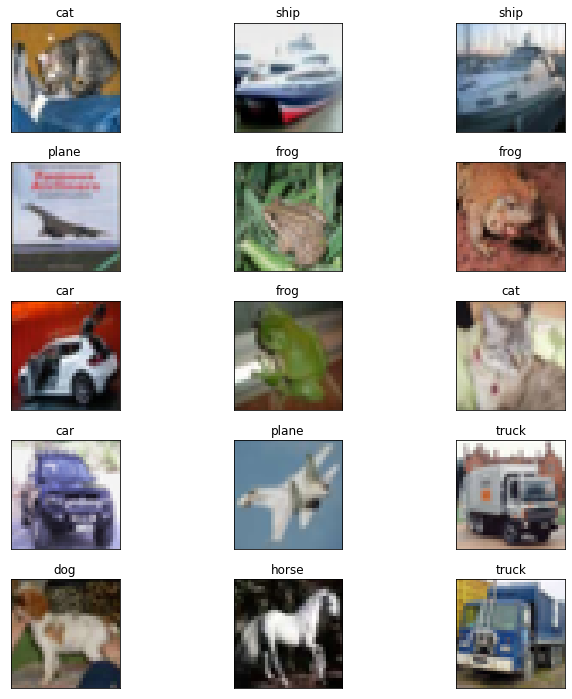

In [4]:
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure(figsize=(10, 10))
batch_data, batch_label = next(iter(test_loader))

t_std = torch.tensor(std).reshape(3, 1, 1)
t_mean = torch.tensor(mean).reshape(3, 1, 1)


for i in range(15):
    plt.subplot(5, 3, i+1)
    plt.tight_layout()

    # get an image - [3, 32, 32]
    # and denormalize
    image = batch_data[i] * t_std + t_mean

    # Clip the input data to the valid range [0, 1]
    image = image.clip(0, 1)
    
    # [3, 32, 32] to [32, 32, 3]
    image = image.permute(1, 2, 0)
    plt.imshow(image)
    
    plt.title(classes[batch_label[i].item()])
    plt.xticks([])
    plt.yticks([])

In [5]:
"""
RF_out = RF_in + (kernel-1) * J_in
J_out = J_in * stride
"""

'\nRF_out = RF_in + (kernel-1) * J_in\nJ_out = J_in * stride\n'

In [6]:
class Cifar38k(ResNet):
    def __init__(self, nclass=10, dropout=0.1, logit_layer="pooling"):
        super(Cifar38k, self).__init__(block=BasicBlock, 
                                       num_channels=[16,16,16,16,16], 
                                       num_blocks=[2,2,2,2], 
                                       nclass=nclass, 
                                       dropout=dropout, 
                                       logit_layer=logit_layer)

model = Cifar38k(logit_layer="pooling").to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
       BatchNorm2d-6           [-1, 16, 32, 32]              32
              ReLU-7           [-1, 16, 32, 32]               0
           Dropout-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 16, 32, 32]           2,304
      BatchNorm2d-10           [-1, 16, 32, 32]              32
       BasicBlock-11           [-1, 16, 32, 32]               0
           Conv2d-12           [-1, 16, 32, 32]           2,304
      BatchNorm2d-13           [-1, 16, 32, 32]              32
             ReLU-14           [-1, 16,

In [7]:
criterion = F.cross_entropy
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)

In [8]:
num_epochs = 15

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train(model, device, train_loader, optimizer, criterion)
    test_loss = test(model, device, test_loader, criterion)
    scheduler.step()

Epoch 1


Train: Loss=1.4943 Batch_id=390 Accuracy=30.40: 100%|██████████| 391/391 [00:13<00:00, 27.96it/s]


Test set: Average loss: 1.6136, Accuracy: 4088/10000 (40.88%)

Epoch 2


Train: Loss=1.5568 Batch_id=390 Accuracy=43.53: 100%|██████████| 391/391 [00:13<00:00, 27.94it/s]


Test set: Average loss: 1.4781, Accuracy: 4463/10000 (44.63%)

Epoch 3


Train: Loss=1.3756 Batch_id=390 Accuracy=52.37: 100%|██████████| 391/391 [00:14<00:00, 26.92it/s]


Test set: Average loss: 1.1836, Accuracy: 5713/10000 (57.13%)

Epoch 4


Train: Loss=1.2267 Batch_id=390 Accuracy=57.39: 100%|██████████| 391/391 [00:13<00:00, 28.44it/s]


Test set: Average loss: 1.1294, Accuracy: 5941/10000 (59.41%)

Epoch 5


Train: Loss=1.1244 Batch_id=390 Accuracy=60.25: 100%|██████████| 391/391 [00:13<00:00, 28.41it/s]


Test set: Average loss: 0.9976, Accuracy: 6468/10000 (64.68%)

Epoch 6


Train: Loss=1.1345 Batch_id=390 Accuracy=62.82: 100%|██████████| 391/391 [00:14<00:00, 27.88it/s]


Test set: Average loss: 0.9568, Accuracy: 6537/10000 (65.37%)

Epoch 7


Train: Loss=0.9596 Batch_id=390 Accuracy=64.78: 100%|██████████| 391/391 [00:13<00:00, 28.96it/s]


Test set: Average loss: 0.9215, Accuracy: 6699/10000 (66.99%)

Epoch 8


Train: Loss=1.0530 Batch_id=390 Accuracy=66.22: 100%|██████████| 391/391 [00:13<00:00, 28.73it/s]


Test set: Average loss: 0.9382, Accuracy: 6685/10000 (66.85%)

Epoch 9


Train: Loss=0.9521 Batch_id=390 Accuracy=67.35: 100%|██████████| 391/391 [00:13<00:00, 29.17it/s]


Test set: Average loss: 0.8669, Accuracy: 6944/10000 (69.44%)

Epoch 10


Train: Loss=0.8701 Batch_id=390 Accuracy=68.50: 100%|██████████| 391/391 [00:13<00:00, 28.18it/s]


Test set: Average loss: 0.9206, Accuracy: 6771/10000 (67.71%)

Epoch 11


Train: Loss=0.9703 Batch_id=390 Accuracy=69.57: 100%|██████████| 391/391 [00:13<00:00, 28.19it/s]


Test set: Average loss: 0.9092, Accuracy: 6806/10000 (68.06%)

Epoch 12


Train: Loss=0.8742 Batch_id=390 Accuracy=70.43: 100%|██████████| 391/391 [00:14<00:00, 27.79it/s]


Test set: Average loss: 0.7889, Accuracy: 7228/10000 (72.28%)

Epoch 13


Train: Loss=0.8220 Batch_id=390 Accuracy=70.93: 100%|██████████| 391/391 [00:13<00:00, 28.18it/s]


Test set: Average loss: 0.7591, Accuracy: 7307/10000 (73.07%)

Epoch 14


Train: Loss=0.8977 Batch_id=390 Accuracy=71.65: 100%|██████████| 391/391 [00:13<00:00, 28.11it/s]


Test set: Average loss: 0.7924, Accuracy: 7196/10000 (71.96%)

Epoch 15


Train: Loss=1.1164 Batch_id=390 Accuracy=72.45: 100%|██████████| 391/391 [00:13<00:00, 28.36it/s]


Test set: Average loss: 0.7879, Accuracy: 7215/10000 (72.15%)



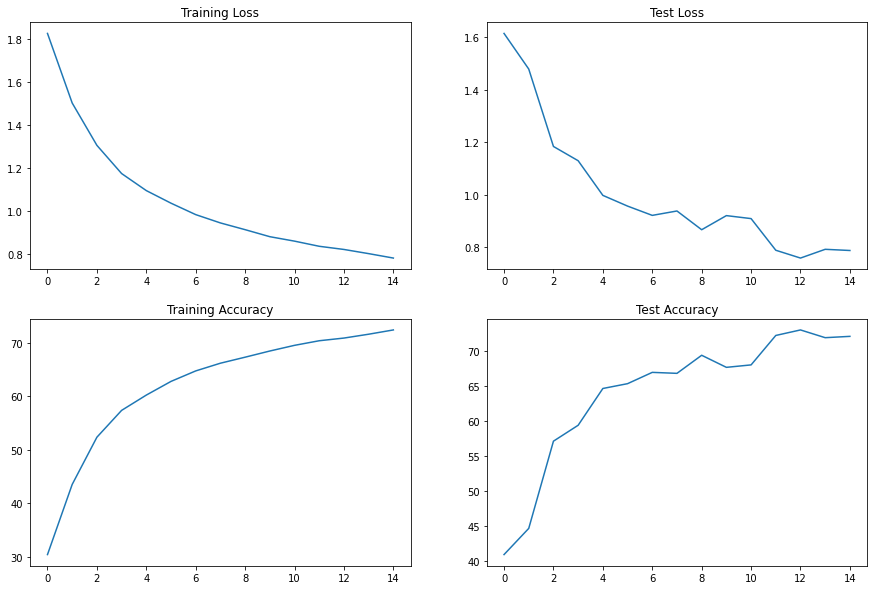

In [9]:
plot_stats()

100%|██████████| 79/79 [00:02<00:00, 36.27it/s]


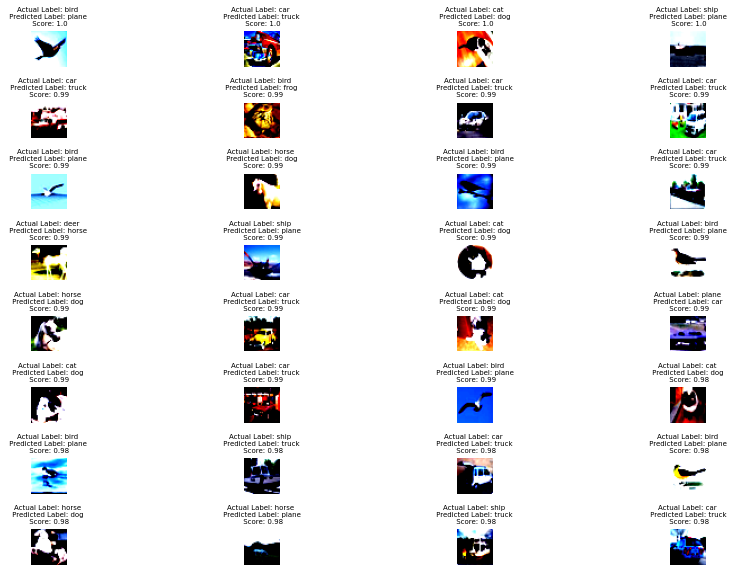

In [10]:
# plot incorrect plus very difficult classifications
p = PlotOutput(device)
p.run_prediction(model, test_loader, class_list=classes, ptype="incorrect")
p.plot(n=32, reverse=True)

100%|██████████| 79/79 [00:02<00:00, 34.14it/s]


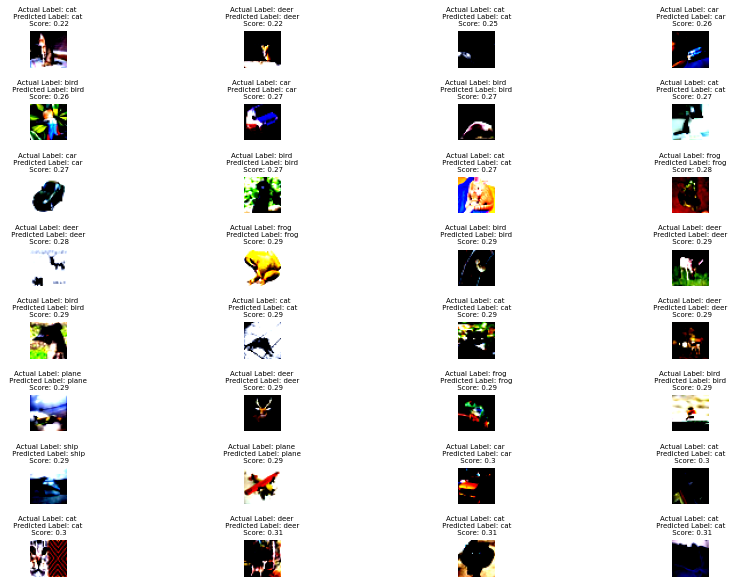

In [11]:
# plot correct yet difficult classifications
p.run_prediction(model, test_loader, class_list=classes, ptype="correct")
p.plot(n=32, reverse=False)